# Newswires Classification

This notebook uses Reuters dataset. In this task we want to classify news into one of the 46 mutually exclusive topics.

In [16]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras import models, layers

# Import dataset

The data in this dataset is already preprocessed. Each word is replaced with word index, 

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print('There are {} training news'.format(len(train_data)))
print('There are {} test news'.format(len(test_data)))

2113536/2110848 [==============================] - 2s 1us/step
There are 8982 training news
There are 2246 test news


## Decoding news

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_news)

557056/550378 [==============================] - 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# Vectorize data

In [9]:
def vectorize_sequences(reviews, dimension=10000):
    results = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        results[i, review] = 1
    return results

x = vectorize_sequences(train_data)
y = to_categorical(train_labels)
x_val = x[:1000]
y_val = y[:1000]
x_train = x[1000:]
y_train = y[1000:]

x_test = vectorize_sequences(test_data)
y_test = to_categorical(test_labels)

# Build classifier

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=[10000]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Train the model

In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 348us/step - loss: 3.2535 - acc: 0.4630 - val_loss: 2.7512 - val_acc: 0.4680
Epoch 2/20
7982/7982 [==============================] - 2s 270us/step - loss: 2.3351 - acc: 0.3715 - val_loss: 2.0680 - val_acc: 0.3540
Epoch 3/20
7982/7982 [==============================] - 2s 226us/step - loss: 1.8074 - acc: 0.3514 - val_loss: 1.7869 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 2s 224us/step - loss: 1.5501 - acc: 0.3514 - val_loss: 1.5862 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 2s 265us/step - loss: 1.2506 - acc: 0.3515 - val_loss: 1.3887 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 2s 279us/step - loss: 1.0298 - acc: 0.4434 - val_loss: 1.0498 - val_acc: 0.7780
Epoch 7/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.6096 - acc: 0.8705 - val_loss: 0.9296 - val_acc: 0.8130


# Plot the history of the training
## Loss

Lets first looks at the loss function

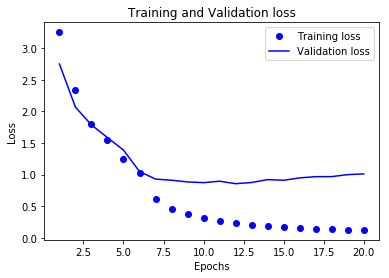

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuracy

And now let's check accuracy

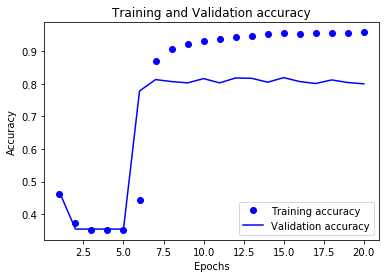

In [13]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
history = model.fit(x_train, y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 260us/step - loss: 0.1031 - acc: 0.9589 - val_loss: 1.0570 - val_acc: 0.8010
Epoch 2/8
7982/7982 [==============================] - 2s 244us/step - loss: 0.1029 - acc: 0.9573 - val_loss: 1.0969 - val_acc: 0.8040
Epoch 3/8
7982/7982 [==============================] - 2s 259us/step - loss: 0.0979 - acc: 0.9597 - val_loss: 1.0668 - val_acc: 0.8100
Epoch 4/8
7982/7982 [==============================] - 2s 231us/step - loss: 0.0964 - acc: 0.9599 - val_loss: 1.1243 - val_acc: 0.7920
Epoch 5/8
7982/7982 [==============================] - 2s 271us/step - loss: 0.0969 - acc: 0.9592 - val_loss: 1.1091 - val_acc: 0.7990
Epoch 6/8
7982/7982 [==============================] - 2s 254us/step - loss: 0.0964 - acc: 0.9588 - val_loss: 1.1897 - val_acc: 0.7840
Epoch 7/8
7982/7982 [==============================] - 2s 269us/step - loss: 0.0946 - acc: 0.9575 - val_loss: 1.1551 - val_acc: 0.7960
Epoch 8

[1.3414960932965163, 0.78183437221727514]

For this dataset the base score is 19%. Our (poor) result is 78%.

## Baseline

In [21]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits = np.array(test_labels) == np.array(test_labels_copy)
print('Base score: {}', float(np.sum(hits)) / len(test_labels))

Base score: {} 0.18121104185218165
